In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
car = pd.read_excel("C:/Users/arshi/OneDrive/Desktop/Data Science NIIT/Project 1/Kaggle Data Set/Car Sales.xlsx")

In [3]:
car

,Car_id,Date,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Brand,Transmission,Color,Price ($),Dealer_No,Discount,Body Style,Phone,Dealer_Region
0,C_CND_000001,2020-01-02,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,DoubleÂ Overhead Camshaft,Ford,Auto,Black,26000,06457-3834,1733.333333,SUV,8264678.0,Middletown
1,C_CND_000002,2020-01-02,Male,1480000,C & M Motors Inc,Dodge,Durango,DoubleÂ Overhead Camshaft,Dodge,Auto,Black,19000,60504-7114,1266.666667,SUV,6848189.0,Aurora
2,C_CND_000003,2020-01-02,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Cadillac,Manual,Red,31500,38701-8047,2100.000000,Passenger,7298798.0,Greenville
3,C_CND_000004,2020-01-02,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Toyota,Manual,Pale White,14000,99301-3882,933.333333,SUV,6257557.0,Pasco
4,C_CND_000005,2020-01-02,Male,1465000,Chrysler Plymouth,Acura,TL,DoubleÂ Overhead Camshaft,Acura,Auto,Red,24500,53546-9427,1633.333333,Hatchback,7081483.0,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23911,C_CND_023903,2021-12-31,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,DoubleÂ Overhead Camshaft,Chevrolet,Auto,Black,16000,06457-3834,1066.666667,Hardtop,7914229.0,Middletown
23912,C_CND_023904,2021-12-31,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,BMW,Manual,Red,21000,99301-3882,1400.000000,Sedan,7659127.0,Scottsdale
23913,C_CND_023905,2021-12-31,Male,13500,Chrysler Plymouth,Chevrolet,Metro,DoubleÂ Overhead Camshaft,Chevrolet,Auto,Black,31000,53546-9427,2066.666667,Passenger,6030764.0,Austin
23914,C_CND_023895,2021-12-31,Male,1650000,Pitre Buick-Pontiac-Gmc of Scottsdale,Mitsubishi,Montero Sport,DoubleÂ Overhead Camshaft,Mitsubishi,Auto,Red,39000,99301-3882,2600.000000,Hardtop,8331483.0,Scottsdale


In [4]:
#checking the null values
car.isnull().sum()/len(car.index)*100

Car_id            0.000000
Date              0.025088
Gender            0.000000
Annual Income     0.000000
Dealer_Name       0.000000
Company           0.066901
Model             0.033450
Engine            0.054357
Brand             0.066901
Transmission      0.083626
Color             0.129620
Price ($)         0.000000
Dealer_No         0.020907
Discount         54.185483
Body Style        0.000000
Phone             0.016725
Dealer_Region     0.000000
dtype: float64

In [5]:
#handling the null data Since the discount column has more  than 50% of data which is null, removing it
car.drop(columns=['Discount'], axis=1, inplace=True)

In [6]:
#date column
car['Date'].fillna(method='ffill', inplace=True)

In [8]:
car['Company'].fillna(method='ffill', inplace=True)

In [9]:
car.Company.unique()

array(['Ford', 'Dodge', 'Cadillac', 'Toyota', 'Acura', 'Mitsubishi',
       'Chevrolet', 'Tata', 'Nissan', 'Mercury', 'BMW', 'Chrysler',
       'Subaru', 'Hyundai', 'Honda', 'Infiniti', 'Audi', 'Porsche',
       'Volkswagen', 'Buick', 'Saturn', 'Mercedes-B', 'Jaguar', 'Volvo',
       'Pontiac', 'Lincoln', 'Oldsmobile', 'Lexus', 'Plymouth', 'Saab',
       'Jeep'], dtype=object)

In [10]:
#car[car['Company']=='Tata'], #index=10
#removing the tata company
car.drop(car[car['Company']=='Tata'].index, axis=0, inplace=True)

In [11]:
car['Model'].fillna(method='ffill', inplace=True)

In [12]:
car['Gender'].value_counts()

Gender
Male      18804
Female     5108
XNA           3
Name: count, dtype: int64

In [13]:
car['Gender'] = car['Gender'].replace('XNA', 'Male')

In [14]:
car['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [15]:
car['Engine'].fillna(method='ffill', inplace=True)

In [16]:
car['Engine'].value_counts()

Engine
DoubleÂ Overhead Camshaft    12581
Overhead Camshaft            11334
Name: count, dtype: int64

In [17]:
car['Engine'].unique()

array(['DoubleÂ\xa0Overhead Camshaft', 'Overhead Camshaft'], dtype=object)

In [18]:
car['Engine'] = car['Engine'].replace('DoubleÂ\xa0Overhead Camshaft','Double Overhead Camshaft')

In [19]:
car['Engine'].unique()

array(['Double Overhead Camshaft', 'Overhead Camshaft'], dtype=object)

In [20]:
car['Brand'].fillna(method='ffill', inplace=True)

In [21]:
car.Brand.unique()

array(['Ford', 'Dodge', 'Cadillac', 'Toyota', 'Acura', 'Mitsubishi',
       'Chevrolet', 'Nissan', 'Mercury', 'BMW', 'Chrysler', 'Subaru',
       'Hyundai', 'Honda', 'Infiniti', 'Audi', 'Porsche', 'Volkswagen',
       'Buick', 'Saturn', 'Mercedes-B', 'Jaguar', 'Volvo', 'Pontiac',
       'Lincoln', 'Oldsmobile', 'Lexus', 'Plymouth', 'Saab', 'Jeep'],
      dtype=object)

In [22]:
car.isnull().sum()/len(car.index)*100

Car_id           0.000000
Date             0.000000
Gender           0.000000
Annual Income    0.000000
Dealer_Name      0.000000
Company          0.000000
Model            0.000000
Engine           0.000000
Brand            0.000000
Transmission     0.083630
Color            0.129626
Price ($)        0.000000
Dealer_No        0.020907
Body Style       0.000000
Phone            0.016726
Dealer_Region    0.000000
dtype: float64

In [23]:
car['Transmission'].fillna(car['Transmission'].mode().iloc[0], inplace=True)

In [24]:
car.Transmission.unique()

array(['Auto', 'Manual', 'auto', 'manual', 'Manuala'], dtype=object)

In [25]:
car['Transmission'] = car['Transmission'].replace(['auto','manual'],['Auto','Manual'])

In [26]:
car['Transmission'] = car['Transmission'].replace({'Manuala':'Manual'})

In [27]:
car.Transmission.unique()

array(['Auto', 'Manual'], dtype=object)

In [28]:
car.Color.unique()

array(['Black', 'Red', 'Pale White', 'Blue', 'Bkue', nan], dtype=object)

In [29]:
car['Color'] = car['Color'].replace({'Bkue':'Blue'})

In [30]:
car['Body Style'].unique()

array(['SUV', 'Passenger', 'Hatchback', 'Hardtop', 'Sedan'], dtype=object)

In [31]:
car['Dealer_Region'].unique()

array(['Middletown', 'Aurora', 'Greenville', 'Pasco', 'Janesville',
       'Scottsdale', 'Austin'], dtype=object)

In [32]:
car.isnull().sum()/len(car.index)*100

Car_id           0.000000
Date             0.000000
Gender           0.000000
Annual Income    0.000000
Dealer_Name      0.000000
Company          0.000000
Model            0.000000
Engine           0.000000
Brand            0.000000
Transmission     0.000000
Color            0.129626
Price ($)        0.000000
Dealer_No        0.020907
Body Style       0.000000
Phone            0.016726
Dealer_Region    0.000000
dtype: float64

In [33]:
car['Color'].fillna(car['Color'].mode().iloc[0], inplace=True)

In [34]:
car.isnull().sum()/len(car.index)*100

Car_id           0.000000
Date             0.000000
Gender           0.000000
Annual Income    0.000000
Dealer_Name      0.000000
Company          0.000000
Model            0.000000
Engine           0.000000
Brand            0.000000
Transmission     0.000000
Color            0.000000
Price ($)        0.000000
Dealer_No        0.020907
Body Style       0.000000
Phone            0.016726
Dealer_Region    0.000000
dtype: float64

In [35]:
car.rename(columns={'Dealer_No ':'Dealer_No'}, inplace=True)

In [36]:
car['Dealer_No'].fillna(method='ffill', inplace=True)

In [37]:
car['Phone'].fillna(method='ffill', inplace=True)

In [38]:
car.isnull().sum()/len(car.index)*100

Car_id           0.0
Date             0.0
Gender           0.0
Annual Income    0.0
Dealer_Name      0.0
Company          0.0
Model            0.0
Engine           0.0
Brand            0.0
Transmission     0.0
Color            0.0
Price ($)        0.0
Dealer_No        0.0
Body Style       0.0
Phone            0.0
Dealer_Region    0.0
dtype: float64

In [39]:
car.Date.dt.year.value_counts()

Date
2021    13267
2020    10642
2002        6
Name: count, dtype: int64

In [40]:
car = car[car['Date'].dt.year != 2002]

In [41]:
car.Date.dt.year.value_counts()

Date
2021    13267
2020    10642
Name: count, dtype: int64

In [42]:
car.drop_duplicates()

,Car_id,Date,Gender,Annual Income,Dealer_Name,Company,Model,Engine,Brand,Transmission,Color,Price ($),Dealer_No,Body Style,Phone,Dealer_Region
0,C_CND_000001,2020-01-02,Male,13500,Buddy Storbeck's Diesel Service Inc,Ford,Expedition,Double Overhead Camshaft,Ford,Auto,Black,26000,06457-3834,SUV,8264678.0,Middletown
1,C_CND_000002,2020-01-02,Male,1480000,C & M Motors Inc,Dodge,Durango,Double Overhead Camshaft,Dodge,Auto,Black,19000,60504-7114,SUV,6848189.0,Aurora
2,C_CND_000003,2020-01-02,Male,1035000,Capitol KIA,Cadillac,Eldorado,Overhead Camshaft,Cadillac,Manual,Red,31500,38701-8047,Passenger,7298798.0,Greenville
3,C_CND_000004,2020-01-02,Male,13500,Chrysler of Tri-Cities,Toyota,Celica,Overhead Camshaft,Toyota,Manual,Pale White,14000,99301-3882,SUV,6257557.0,Pasco
4,C_CND_000005,2020-01-02,Male,1465000,Chrysler Plymouth,Acura,TL,Double Overhead Camshaft,Acura,Auto,Red,24500,53546-9427,Hatchback,7081483.0,Janesville
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23910,C_CND_023902,2021-12-31,Male,13500,C & M Motors Inc,Plymouth,Voyager,Overhead Camshaft,Plymouth,Manual,Red,12000,60504-7114,Passenger,8583598.0,Pasco
23911,C_CND_023903,2021-12-31,Female,900000,Ryder Truck Rental and Leasing,Chevrolet,Prizm,Double Overhead Camshaft,Chevrolet,Auto,Black,16000,06457-3834,Hardtop,7914229.0,Middletown
23912,C_CND_023904,2021-12-31,Male,705000,Chrysler of Tri-Cities,BMW,328i,Overhead Camshaft,BMW,Manual,Red,21000,99301-3882,Sedan,7659127.0,Scottsdale
23913,C_CND_023905,2021-12-31,Male,13500,Chrysler Plymouth,Chevrolet,Metro,Double Overhead Camshaft,Chevrolet,Auto,Black,31000,53546-9427,Passenger,6030764.0,Austin


In [43]:
car.describe()

,Date,Annual Income,Price ($),Phone
count,23909,2.390900e+04,2.390900e+04,2.390900e+04
mean,2021-03-01 16:21:18.045924352,8.354714e+05,2.831506e+04,7.497718e+06
min,2020-01-02 00:00:00,1.008000e+04,0.000000e+00,6.000101e+06
25%,2020-09-20 00:00:00,3.870000e+05,1.800100e+04,6.746591e+06
50%,2021-03-13 00:00:00,7.350000e+05,2.300000e+04,7.496196e+06
75%,2021-09-08 00:00:00,1.177000e+06,3.400000e+04,8.248210e+06
max,2021-12-31 00:00:00,4.000000e+07,2.900000e+06,8.999579e+06
std,NaN,8.246776e+05,2.862473e+04,8.673944e+05


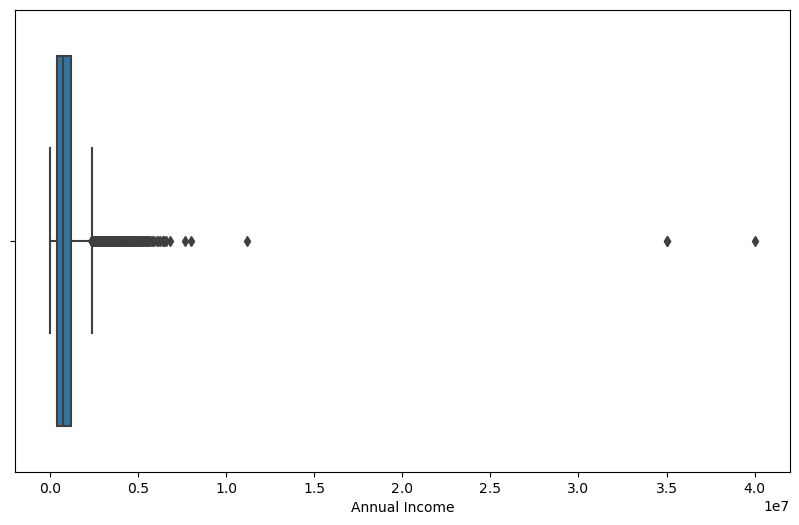

In [45]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Annual Income', data=car)
plt.show()

In [46]:
#outliers
Q1 = car['Annual Income'].quantile(0.25)
Q3 = car['Annual Income'].quantile(0.75)
IQR = Q3-Q1
lf = Q1-1.5*IQR
uf = Q3+1.5*IQR
print(lf)
print(uf)

-798000.0
2362000.0


In [47]:
car = car[(car['Annual Income']>=lf)&(car['Annual Income']<=uf)]

<Axes: xlabel='Annual Income'>

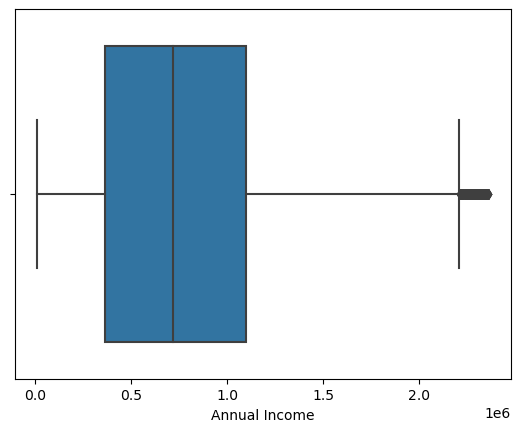

In [48]:
sns.boxplot(x='Annual Income', data= car)

<Axes: xlabel='Price ($)'>

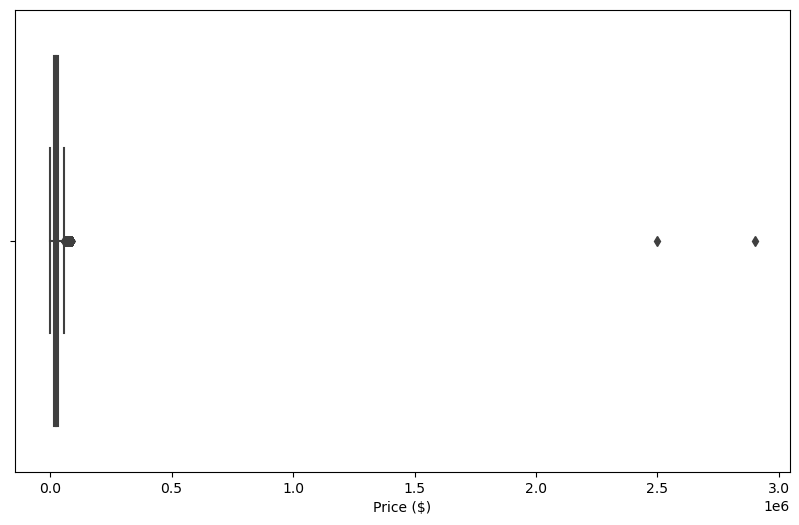

In [49]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Price ($)', data=car)

In [50]:
#outliers
Q11 = car['Price ($)'].quantile(0.25)
Q33 = car['Price ($)'].quantile(0.75)
IQRR = Q33-Q11
lff = Q11-1.5*IQRR
uff = Q33+1.5*IQRR
print(lff)
print(uff)

-5997.5
57998.5


In [51]:
car = car[(car['Price ($)']>=lff)&(car['Price ($)']<=uff)]

<Axes: xlabel='Price ($)'>

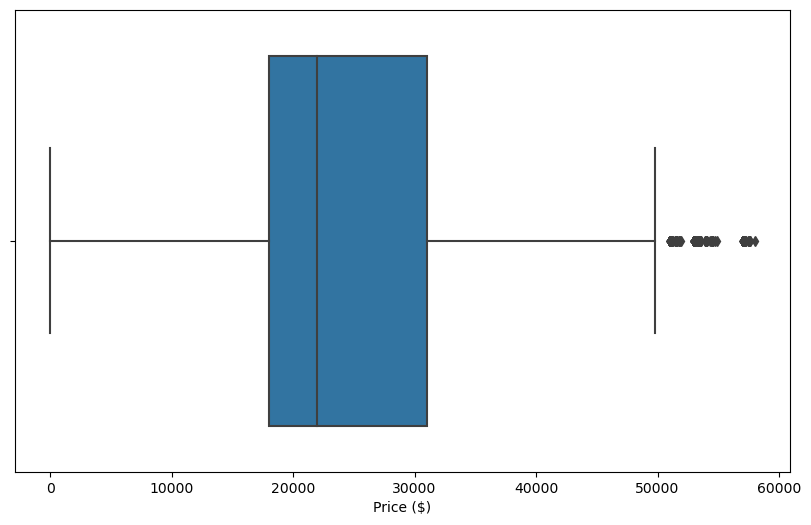

In [52]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Price ($)', data=car)

In [53]:
car.describe()

,Date,Annual Income,Price ($),Phone
count,21697,2.169700e+04,21697.000000,2.169700e+04
mean,2021-03-02 14:43:10.035488512,7.505263e+05,25431.060239,7.497081e+06
min,2020-01-02 00:00:00,1.008000e+04,0.000000,6.000101e+06
25%,2020-09-21 00:00:00,3.650000e+05,18000.000000,6.746090e+06
50%,2021-03-13 00:00:00,7.150000e+05,22001.000000,7.494144e+06
75%,2021-09-08 00:00:00,1.100000e+06,31000.000000,8.247602e+06
max,2021-12-31 00:00:00,2.361000e+06,57990.000000,8.999305e+06
std,NaN,5.635022e+05,10687.038898,8.674374e+05


In [54]:
mean_price = car['Price ($)'].mean()
car['Price ($)'] = car['Price ($)'].replace(0,mean_price)

In [55]:
car.describe()

,Date,Annual Income,Price ($),Phone
count,21697,2.169700e+04,21697.000000,2.169700e+04
mean,2021-03-02 14:43:10.035488512,7.505263e+05,25436.920740,7.497081e+06
min,2020-01-02 00:00:00,1.008000e+04,1200.000000,6.000101e+06
25%,2020-09-21 00:00:00,3.650000e+05,18000.000000,6.746090e+06
50%,2021-03-13 00:00:00,7.150000e+05,22001.000000,7.494144e+06
75%,2021-09-08 00:00:00,1.100000e+06,31000.000000,8.247602e+06
max,2021-12-31 00:00:00,2.361000e+06,57990.000000,8.999305e+06
std,NaN,5.635022e+05,10680.061818,8.674374e+05


<Axes: xlabel='Price ($)'>

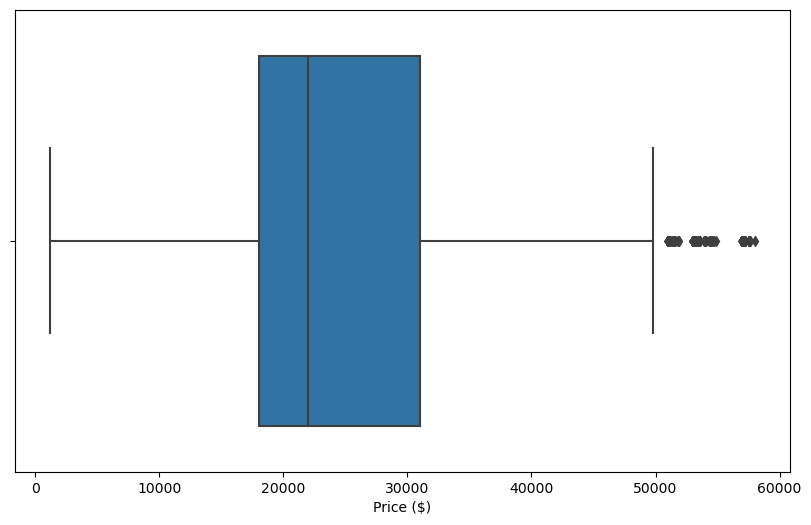

In [56]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Price ($)', data=car)

In [57]:
car['equals'] = car['Company']==car['Brand']

In [58]:
car['equals'].unique()

array([ True])

In [59]:
car.drop(columns=['Brand','equals'], axis=1, inplace=True)

In [60]:
#data is cleaned
car.to_csv('car_data.csv', index=False)

In [61]:
#Gender Distribution Analysis:

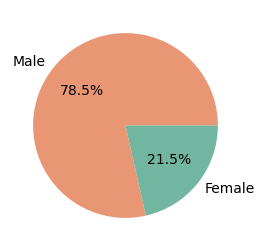

In [62]:
gender = car.Gender.value_counts()
color=['#e99674', '#72b6a1']
plt.figure(figsize=(3,3))
plt.pie(data=gender, labels=gender.index,x=gender.values, autopct='%1.1f%%', colors=color)
plt.show()

In [63]:
#Price Range Analysis:
#What is the distribution of products based on their price range 
#Graph: Histogram or box plot showing the distribution of product prices.

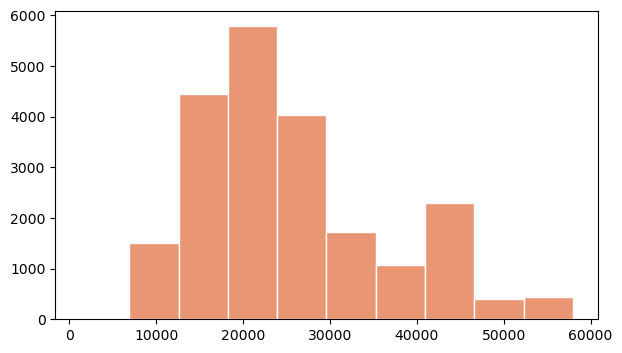

In [64]:
plt.figure(figsize=(7,4))
plt.hist(car['Price ($)'], bins=10, color='#e99674', edgecolor='white')
plt.show()

In [65]:
#Identify which car brands have the highest sales count.

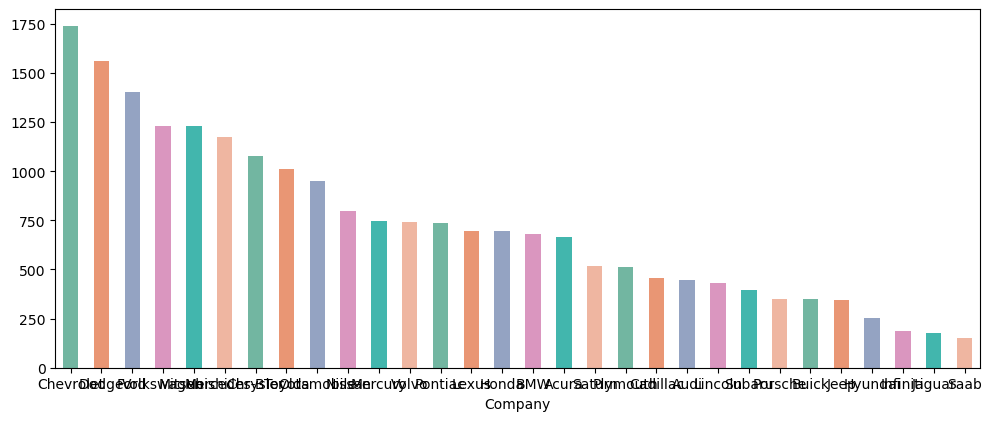

In [66]:

plt.figure(figsize=(10,5))
brand_sales = car['Company'].value_counts()

brand_sales.plot(kind='bar', color=['#72b6a1','#e99674','#94a3c2', '#DA96bf','#42b6ad','#efb6a1'])
plt.tight_layout()
plt.xticks(rotation=0)
plt.show()

In [67]:
#Explore the distribution of different transmission types in the dataset.

52.76
47.24


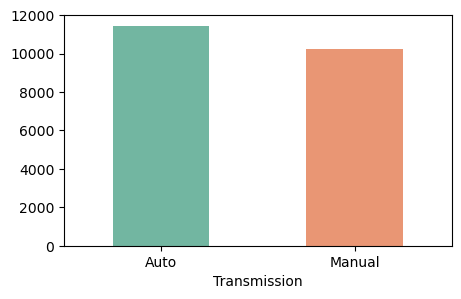

In [68]:
trans = car['Transmission'].value_counts()
print(round(trans.values[0]/(trans.values[0]+trans.values[1])*100,2))
print(round(trans.values[1]/(trans.values[0]+trans.values[1])*100,2))
color=['#72b6a1','#e99674']
plt.figure(figsize=(5,3))
trans.plot(kind='bar', color=color)
plt.xticks(rotation=0)
plt.show()

<Figure size 600x400 with 0 Axes>

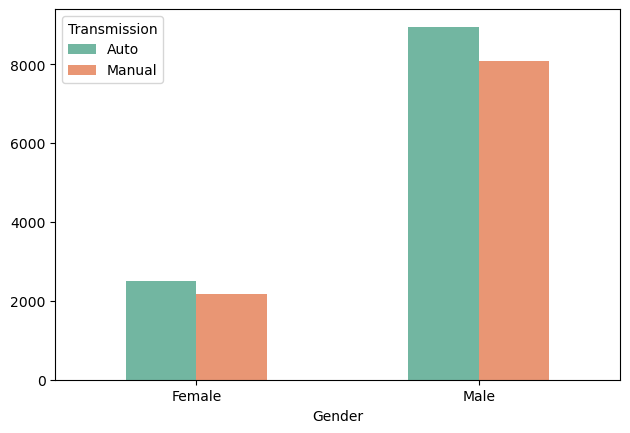

In [69]:
trans_gender = car.groupby(['Gender', 'Transmission']).size().unstack(fill_value=0)
plt.figure(figsize=(6,4))
trans_gender.plot(kind='bar', color=color)
plt.tight_layout()
plt.xticks(rotation=0)
plt.show()

In [70]:
#Determine the popularity of different car colors based on the dataset.

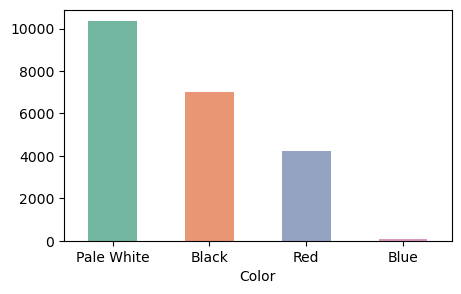

Color
Pale White    47.81
Black         32.29
Red           19.59
Blue           0.30
Name: count, dtype: float64


In [71]:
color = car.Color.value_counts()[:4]
plt.figure(figsize=(5,3))
color1=['#72b6a1','#e99674','#94a3c2', '#DA96bf']
color.plot(kind='bar', color=color1)
plt.xticks(rotation=0)
plt.show()
summ = sum(color)
print(round(color/summ*100,2))

In [72]:
#Analyze how gender influences car purchasing decisions.

<Figure size 600x400 with 0 Axes>

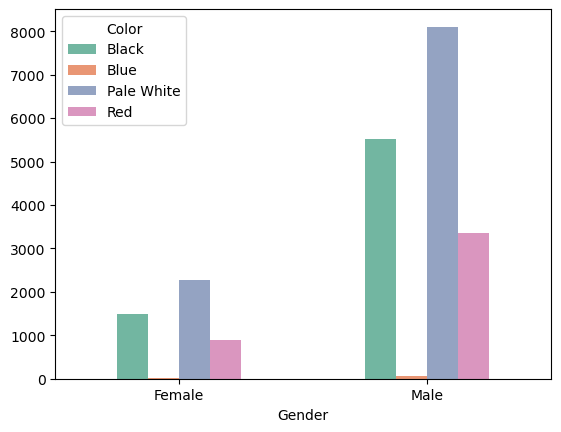

Color   Black  Blue  Pale White   Red
Gender                               
Female   1489    14        2269   887
Male     5518    52        8104  3364


In [73]:
color_gender = car.groupby(['Gender', 'Color']).size().unstack(fill_value=0)
color=['#72b6a1','#e99674','#94a3c2', '#DA96bf']
plt.figure(figsize=(6,4))
color_gender.plot(kind='bar', color=color)
plt.xticks(rotation=0)
plt.show()
print(color_gender)

In [74]:
# Investigate if there is a correlation between the annual income of customers and the prices of cars they purchase.

<Axes: xlabel='Annual Income', ylabel='Price ($)'>

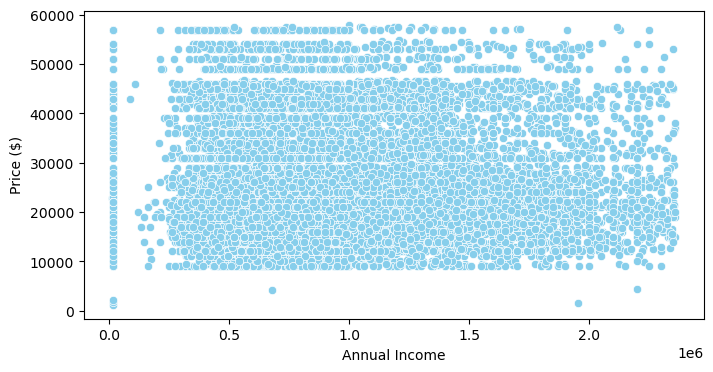

In [75]:
plt.figure(figsize=(8, 4))
sns.scatterplot(x='Annual Income', y='Price ($)', data=car, color='skyblue', )

In [76]:
#How does gender influence car purchases?

<Axes: xlabel='Gender', ylabel='count'>

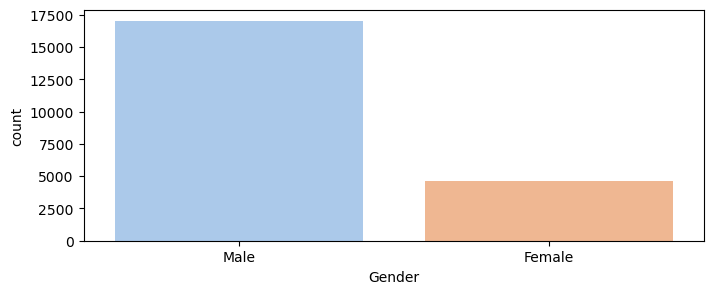

In [77]:
plt.figure(figsize=(8, 3))
sns.countplot(x='Gender', data=car, palette='pastel')

In [78]:
#Identify which dealer regions have the highest count of car sales.

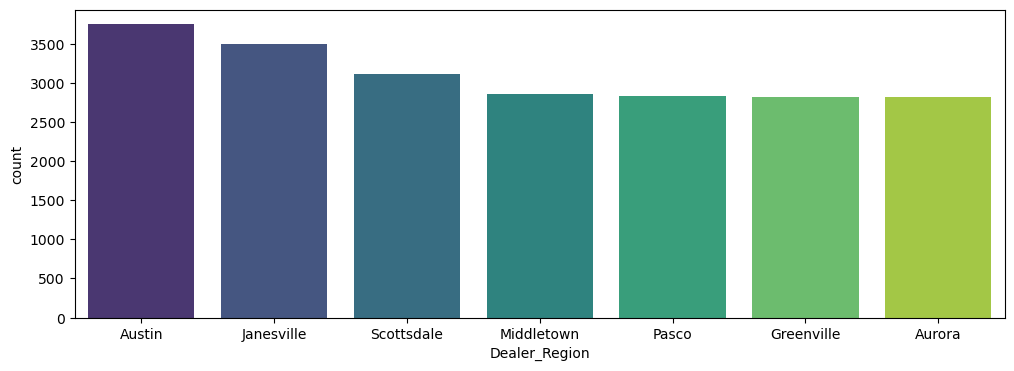

In [79]:
plt.figure(figsize=(12,4))
sns.countplot(x='Dealer_Region', data=car, palette='viridis', order=car['Dealer_Region'].value_counts().index)
plt.show()

In [80]:
#Determine the preferred body styles of cars among customers.

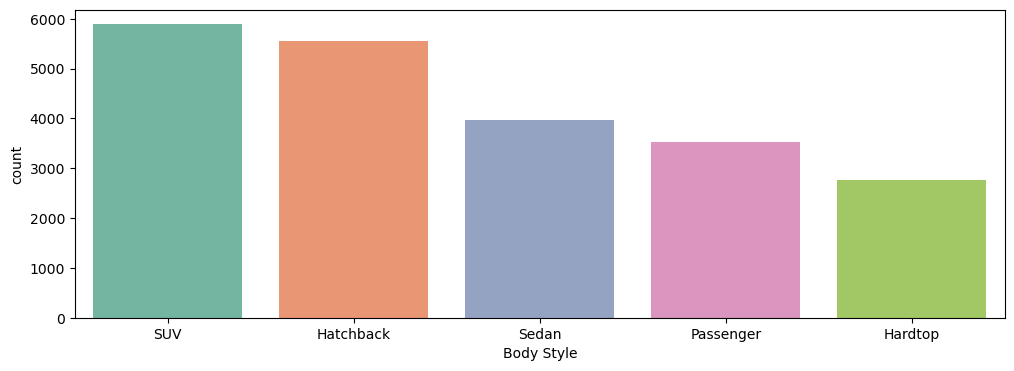

In [81]:
plt.figure(figsize=(12,4))
sns.countplot(x='Body Style', data=car, palette='Set2', order=car['Body Style'].value_counts().index)
plt.show()

In [82]:
#Explore the distribution of preferred price ranges among customers.

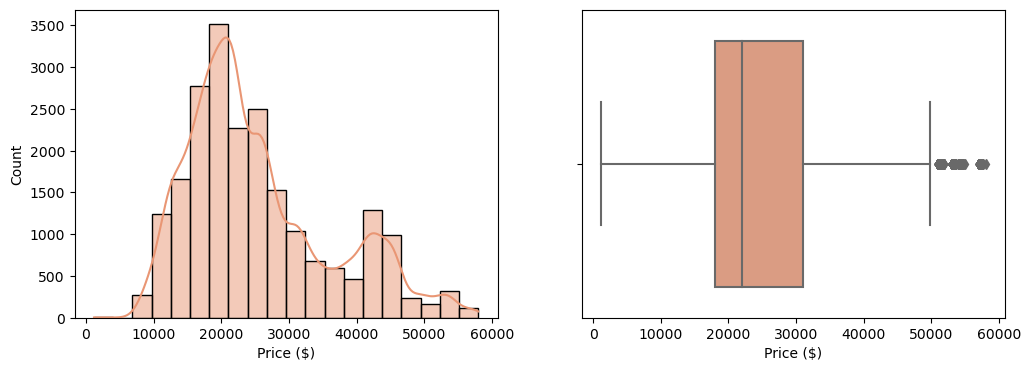

In [83]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(car['Price ($)'], bins=20, kde=True, color='#e99674')

plt.subplot(1, 2, 2)
sns.boxplot(x=car['Price ($)'], color='#e99674')
plt.show()

In [84]:
#Investigate if there is a correlation between the annual income of customers and the prices of cars they purchase.

In [85]:
correlation = car[['Annual Income', 'Price ($)']]
cor = correlation.corr()
cor

,Annual Income,Price ($)
Annual Income,1.00000,0.01074
Price ($),0.01074,1.00000


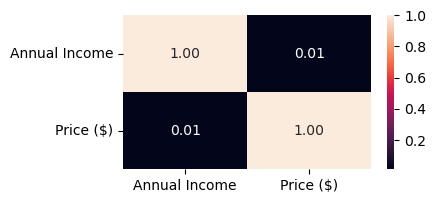

In [86]:
plt.figure(figsize=(4,2))
sns.heatmap(cor, annot=True, fmt='.2f')
plt.show()

In [87]:
#there is a very weak positive correlation between 'Annual Income' and 'Price ($)'. 
#The positive sign indicates that as one variable increases, the other variable tends to 
#increase slightly. However, the value is close to zero, suggesting that the correlation is very weak

In [88]:
car.columns

Index(['Car_id', 'Date', 'Gender', 'Annual Income', 'Dealer_Name', 'Company',
       'Model', 'Engine', 'Transmission', 'Color', 'Price ($)', 'Dealer_No',
       'Body Style', 'Phone', 'Dealer_Region'],
      dtype='object')